---
Replication Project for Microeconometrics in 2020 SS| Msc. Economics Bonn University| Author: Po-Tse Cheng

# The Effect of Terrorism on Employment and Consumer Sentiment: Evidence from Successful and Failed Terror Attacks

### Original Author: Abel Brodeur

##### Published Journal: American Economics Journal, Applied Economics 2018

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from auxiliary.auxiliary_func import*
import warnings
from arch.unitroot import ZivotAndrews

#some of the code will cause runtime warning; below is the code to surpress it
warnings.filterwarnings("ignore")

### General Information regarding this Notebook:


- For the sake of transparency, the original paper and all data relevant for replication can be accessed [here](https://www.aeaweb.org/articles?id=10.1257/app.20160556).

- The causal graph is created using the web-based environment [Dagitty](http://www.dagitty.net/), which provides insightful graphs and can be easily export into $\LaTeX$, picture files, or R-based code.

**Below describes the achievements and limitations within the scope of this replication:**

*What can be expected:*

1. All observations in the table are **not** hardcoded; please check the original code to verify this.

2. All the coefficients are the same. However, there are some which are slightly different; this is because of some minor mistakes in the authors original codes.

3. Brodeur (2018) did a thorough job in the robustness check and included most of the results in the appendix. Almost all of the appendix tables are recreated as I deemed to provide excellent evidence supporting the findings.

4. All figures have a stricter significance level than the original ones presented by Brodeur (2018).

5. This replication follows closely to the original structure from the paper. Additional extensions are provided to clarify the whole analysis.

*The limitation:*

1. One may notice that the R-square values and standard errors will differ from time to time, this is a result of using a custom function constructed with [**Patsy**](https://patsy.readthedocs.io/en/latest/) and [**StatsModel**](https://www.statsmodels.org/stable/index.html) inspired by the internet, as both, [**PanelOLS**](https://pypi.org/project/linearmodels/) and the original models within [**StatsModel**](https://www.statsmodels.org/stable/index.html), failed to give acceptable coefficient outputs. I have also tried the [**Econtool**](http://www.danielmsullivan.com/econtools/) by Daniel M. Sullivan but failed as the nature of the model is too complex for the tools.

2. Figure 2 is skipped as I determined it is not important to reach our conclusion.

3. Table 10 is not recreated due to the expensive nature of the database. The public survey does not have the county-level data of residence.

4. Docstrings are missing in the codes.

5. Asterisks are omitted in the original paper. I therefore did not include asterisks in my replication.

6. The robustness check for year omission, figure 1, extension figure will take a while to run compared to other tables and graphs. The first case is due to the for-loop within the code, while the second and third is due to the size of the raw data.

### **Table of Content**
---

**1. [Introduction](#chap1)**  <a id='top'></a>  
    
**2. [Conceptual Framework](#chap2)**
    
$\quad$ **2.1** [Attack Background](#chap2.1)

$\quad$ **2.2** [Possible Channels](#chap2.2)

$\quad$ **2.3** [Data Sources](#chap2.3)

**3. [Identification & Model Specification](#chap3)**

$\quad$ **3.1** [Causal Graph](#chap3.1)

$\quad$ **3.2** [Identification Assumption Evaluation](#chap3.2)

$\quad$ **3.3** [Model Specification](#chap3.3)

$\qquad$ **3.3.1** [Basic Model](#chap3.3.1)

$\qquad$ **3.3.2** [Comparison Model](#chap3.3.2)

**4. [Replication Results](#chap4)**

$\quad$ **4.1** [Descriptive Statistic](#chap4.1)

$\quad$ **4.2** [Main Results](#chap4.2)

$\qquad$ **4.2.1** [Basic Model](#chap4.2.1)

$\qquad$ **4.2.2** [Comparison Model](#chap4.2.2)

**5. [Robustness Check](#chap5)**

$\quad$ **5.1** [Other Data Usage](#chap5.1)
    
$\quad$ **5.2** [Time Period Alternatives](#chap5.2)

$\quad$ **5.3** [Specific Year Omission](#chap5.3)
    
$\quad$ **5.4** [Specific Incidents Omission](#chap5.4)

$\quad$ **5.5** [Specific Terrorist Groups Omission](#chap5.5)
    
$\quad$ **5.6** [Immigration](#chap5.6)
    
**6. [Channels Reexamination](#chap6)**

$\quad$ **6.1** [Employment and Earnings by Industry](#chap6.1)
    
$\quad$ **6.2** [House Price Index](#chap6.2)

$\quad$ **6.3** [Media and Public Awareness](#chap6.3)
    
$\quad$ **6.4** [Consumer Sentiment](#chap6.4)

**7. [Extension: After the Storm](#chap7)**

**8. [Conclusion](#chap8)**

[References](#ref)


# 1. Introduction <a id='chap1'></a>
---

The notion of Terrorism has been widely popularised after the devastating 9/11 attack and Oklahoma City Bombing. Many economic studies regarding terrorist attacks were made to evaluate the after effects of such attacks. However, given the complex nature of the economy, different conclusions were drawn from different perspectives. Difficulties arised partly because the number of affected channels, and also the rapid recovery of modern Economy. Brodeur (2018) aimed to encompass all possible channels and analysed the ex-post effect on employment. Under a normal setting, a clear causal impact of terrorism is difficult to establish as local economic charachteristics differ (e.g. a targeted county vs a non-targeted county) and other unobsevered economic shocks may interfere with the outcome. Brodeur (2018) addressed these issues by including a wide variety of labels to each attack ranging from 1970 to 2013 then compared directly the difference between outcomes. Brodeur (2018) constructed two main models to evaluate the aftermath: 
- The basic model is simple, with its focus on analyzing the impact solely on successful attacks. 
- The comparison model however also includes a **Difference-In-Difference design(DID)** in order to have a direct comparison of both successful and failed attacks under similar circumstances. 

The end result generated from the models suggested a successful attack will result in a 2 percent drop in both employment and total earnings in the targeted county compared to failed attacks. Specific channels also result in losses, and consumers become more pessimistic.

---

This notebook contains recreations of tables and figures originated in Brodeur (2018). Most of the tables in appendix are also recreated, which serves important robustness checks to validate the result. The channels and identification method used by Brodeur (2018) will be deeply discussed later. The paper itself has already provided the readers with plenty of evidence to support its claim. I added causal graphs, and multiple figures to complete or clarify some of the initial analysis. There is also one extension chapter that I slightly tweaked models from Brodeur (2018) to showcase more potential conclusions from the findings.

This notebook is constructed in the following way: Firstly, I will introduce the conceptual framework of the paper and potential channels. In the 3rd section, I will then present the identification methods the author employed and connected the concept with causal graphs from the lectures. The main replication results of the paper will be shown in section 4 (while some may separated in other sections for clarification). Section 5 present series of robustness checks. We will then revisit the channels in section 6 to examine the effects and visit my extension chapter. I will finally conclude the notebook in section 8.

# 2. Conceptual Framework <a id='chap2'></a>
---

## 2.1 Attack Background <a id='chap2.1'></a>
---

Before we dive into the paper, a clear definition for a terrorist attack and the criteria of selecting the samples must be established. Global Terrorism Database (GTD) determined an incident is an act of terror if the act is intentional accompanied by usage of violence and the perpetrators are subnational actors. In addition, two out of three criteria below need to be fulfilled:

1. The act must be aimed at attaining an economic, political, religious, or social goal.
2. There must be evidence of an intention to coerce, intimidate or convey some other message to a larger audience than immediate victims.
3. The act must be outside the context of legitimate war activities.

In Brodeur (2018), the author only took the attacks that fulfilled all three criteria into account, as a similar setting is used by US Department of State. This paper will only focus attacks that occurred in the states, also note that the we will cluster our observations in county-size level. This choice was deliberately made by the author as it gives a better picture for analysing local economies than comparing one county to another, as there exist fundamental differences between county and county (A detailed discussion is given in Section 3). The timeline will be from 1970 to 2013. Here are some other additional guidelines that the author established to determine the attack location (region): 

1. Most cases are where the location of the attack is commenced
2. For plane hijacking, the destination of the plane is used to pinpoint the attack location.
3. If a plane hijack failed, the location of the county is then considered as the destination.
4. Mail-based attacks also only consider the final destination.

Another important thing to mention is even given these strict guidelines, there are some exceptions. For instance, there are two plane hijacking cases which are excluded. The hijacking in both cases took place in US, however one landed in Mexico while the other landed in Cambodia. All attacks in 1993 are excluded as well because the data fell off a truck while in transit, which is documented in the GTD codebook.

## 2.2 Possible Channels <a id='chap2.2'></a>
---

Plenty of causal channels are at work when it comes to the after effect of terrorist attack. Below is a short list to highlight the possible channels that may contribute to the overall results found in this paper:

1. Destruction of human and physical capital

2. Increased Uncertainty 

3. Migration

4. Increase expenditure in counter terrorism

Some of these channels are arguably vague and difficult to find a proxy. Brodeur (2018) quantifies these channels via the followings:

<ol>
<li> The damage done by terrorist attacks is focused on both physical and human capital destruction, as the data gathered from GTD contain thorough details on each attack including the property damage and deaths. Brodeur (2018) <b>does not</b> include analysis in the human capital lost as these data themselves require multiple assumptions to predict possible economic output by the deceased. Instead, the analysis will be solely focused on physical destruction. The interesting property shown in the data is that most terror attacks <b>does not</b> result in catastrophical building damage. The average property damage from the timeline 1970 to 2013 is merely $750,000. Compared to the jobs and earning reduction this result alone did not provide a significant explanation, as the reduction resulted in far higher number. Most terrorist attacks also <b>does not</b> result in high causalities with an average of 4 people in total (Results could be find in Section 4). Outliners such as 9/11 did possessed a broader effect as estimated by Becker and Murphy (2001) contributed to 0.2 percent of physical assets and 0.06 percent of productive assets in US economy. Later in the robustness check the author will show the outliners did not affect the overall result. </li>
<br>

<li> Most terrorist attacks aim to achieve their goals via generating fear for future to the public. The outcome will increase uncertainty for the future. Consumers are expected to be more pessimistic, and successful attack in particular is expected to create more pessimism in different industries and job markets compared to failed attacks. The whole analysis is broken into two steps: First, the author examined the news archive to check the different coverage of success and failed attacks received from news outlets. Afterwards, different sectors of industries and consumer surveys are examined to show the impact from the attack. The intuition is based on most people acquired the information of successful or failed attack via local media, and further react to this newly-acquired info on the economics market. </li>
<br>

<li> Migration is a possible channel to an attack. People may deem their individual working and living conditions in jeopardy after an attack. Dreher et al.(2011) suggested the attack may influence the decision for individual migration. It is also likely the intense fear generated from the attack increase the desire to move out(in) certain counties. The author however finds no evidence that support this claim in the targeted county. A thorough examination of this particular channel will be in section 5. </li>
<br>

<li> Draca et al.(2011) concluded that a terrorist attack is likely to result in an increase of counter-terrorist expenditures. This translate into more employment opportunities which could have a possible positive impact on the job market; on the other hand, the newly created workforce is considered an unproductive workforce. This channel in the end did not concern our result too, since this expenditure is mostly at a national level. </li>
</ol>

<div class="alert alert-block alert-info">
<b>Notes:</b> Below are some of the extended papers regarding aforementioned channels
<ol>
    <li><a href='#ref3'>Fich et al.(2019)</a> further examine the human capital loss after a successful attack using the setting of Brodeur (2018). They concluded the attack will decrease general human capital output and worsen the economy due to increase uncertainty of future.</li>
    <li><a href='#ref9'>Mitra et al.(2017)</a> is one of the few papers that works on airport security. They included counter-terrorism expense in their paper, and found international air passenger are extremely sensitive in transport-oriented attacks.</li>
</ol>
</div>

## 2.3 Data Sources <a id='chap2.3'></a>
---

<ol>
<li> The study conducted in this paper rely on the GTD which is an open source database maintained by Study of Terrorism and Responses to Terrorism <a href="https://www.start.umd.edu/" title=”Wikipedia”>(START)</a>. The data is gathered mainly through public available resources such as media articles and news archive. The data for each attack contains details such as enemy tactics and weapons usage. The descriptive statistic regarding the time period 1970 to 2013 could be find in Section 4.</li>
<br>

<li> For employment and earnings at a county level the author used the County Business Patterns (CBP) dataset. The dataset contains data from US Census Burea, Economic Census, and Company Organisation Survey. The dataset itself contains most of the industries on a county level, in the mean time exclude industries such as Military, Public Transportation, and Household employment.</li> 
<br>

<li> The Household employment and total earnings are generated through the Bureau of Economic Analysis (BEA) via following the framework provided on their website.</li>
<br>

<li> The Vanderbilt Television News Archive (VTNA) is the archive used to match GTD database. The author manually search every attacks via inserting keywords of suspects or the incident name. All data gathered by the author is cross-validated by other independent research assistants as well.</li>
<br>

<li> Federal Housing Finance Agency housing index is again matched with the time period with the GTD dataset to estimate particular the effect on housing industries.</li>
<br>


<li> Lastly, Brodeur (2018) used the University of Michigan Consumer Sentiment Index (UMCS) to estimate consumer sentiment during the time period. The survey includes county of residence of respondents, which is essential for a study in county-level; nevertheless, the public version of the survey did not include this confidential information.</li>
    
</ol>

<div class="alert alert-block alert-warning">
<b>These database can be accessed here:</b> 
<ul>
    <li> <a href="https://www.start.umd.edu/gtd/">GTD</a> </li>
    <li> <a href="https://www.census.gov/programs-surveys/cbp/data.html">CBP</a> </li>
    <li> <a href="https://www.bea.gov/data">BEA</a> </li>
    <li> <a href="https://tvnews.vanderbilt.edu/">VTNA</a> </li>
    <li> <a href="https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index.aspx">House Index</a> </li>
    <li> <a href="https://data.sca.isr.umich.edu/data-archive/mine.php">UMCS</a> </li>
</ul>
</div>

# 3. Identification & Model Specification <a id='chap3'></a>
---

## 3.1 Extension: Causal Graph <a id='chap3.1'></a>
---

In this subsection I will try to create a rudimentary causal graph using the info we have gathered so far. The causal graph approach assists us identifying obstacles and come up with strategies for the analysis. This step is also important for the general structure, as it provides a rational reasoning to our assumption. Please consider the following causal graph:

##### Causal Graph: 

<img src="Pics/Causal 1.png">

**Legend:**
- T denotes Treatment (Successful Attacks)
- O denotes Outcome
- S denotes Economics Shocks
- U denotes All Unobservables
- L denotes Location
- C denotes Local Economy's Characteristics

The original causal graph I produced painted a grim picture for estimating the effect for treatment and outcome. One can easily observed that it is nearly impossible to establish a unbiased causal estimate on a country level. Difference arise from county to county and result in many unobservables and hidden relationship as shown in the graph. However, one can exploit the random nature of the successful attack, as there are no economics indicator to signal the outcome of an attack as far as we know. The samples Brodeur (2018) incorporated also exist no preselection, which were shown later in the tables. We can see that 
via conditioning our exogenous variable T on L, all possible backdoor paths could be blocked. Brodeur (2018) is inspired by [Benmelech et al.(2010)](#ref5) and therefore decided to approach this problem via conditioning our observations within the targeted location (county). This assumption is required since it allows us to establish the causal inference in the comparison model. We will assume this for now, and later examine this assumption.  

- We know the following holds from the original causal graph:

\begin{equation}
Y_{0}, Y_{1} \not\!\perp\!\!\!\perp Success
\end{equation}

- After **Conditional Independence Assumptions (CIA)**:

\begin{equation}
Y_{0}, Y_{1} \perp \!\!\! \perp Success \mid (Targeted\, Location) \equiv Y_{0}, Y_{1} \perp \!\!\! \perp \epsilon
\end{equation}

Where the $Y_{1}$ indicate the outcome of successful attack and $Y_{0}$ vice versa. This choice of estimation is appealing, as stratification result in a lot of non-observables become intrinsic value of the targeted location, which also result in lowering the selection bias to 0. After discarding all the irrelevant values, we were then presented with the option of using different attack dummy variables to examine the relationship between treatment and outcome. We will then verify that the conditioned successful attack is indeed an independent variable in the next subsection.

## 3.2 Identification Assumption Evaluation <a id='chap3.2'></a>
---

Our key identification assumption throughout the paper, is that we assume the rate of success is exogenous conditional on our county-level observables. Also with each attack comes with different labels, which specify the tactics and weapons of choice. This preparation allows the models to identify the effects under similar circumstances (e.g. 
a successful assassination versus a failed one) therefore the models can sidestep the obstacles of controlling all economics shocks and identifying local economics characteristics. In addition, it provides a more detailed insights on local counties. The key intuitions of the assumption are the followings:

 - **Successful and Failed attacks will become exogenous variables**
 - **Identification for attacks**


In this subsection we will try to explore if our key identification assumption is reasonable, this is important for our causal graph to hold. The main concern for the current set-up is reverse causality. This threat for our identification is also been verified by [De Mesquita et al.(2005)](#ref2) as they showed in their paper that poor economics environment produce more terrorist attacks linked with major terrorist groups. However, the attacks that occurred in our samples are mostly linked to lone-wolf attacks or the deed by minor extremist group as shown in the descriptive statistic. Nonetheless, if a linkage for reverse causality indeed exists, then the county-level estimation would be biased.

We will start our verification process by employing an exhaustive list of variables, which covered different aspects of the county such as crime, social welfare etc. Additionally, the author constructed other controlled variables such as: state capitals, coastal counties, county based on airport with large hub or medium hub, and four census regions. Brodeur (2018) followed the suggestion of National Oceanic and Atomospheric Administration and defined coastal counties as a county with more than 15% of county's total land area located in the nation's coastal watershed. The large or medium airport hub (within the county) possessed the same definition from Federal Aviation Administration, which stated a large hub is equal to at least 1 percent of total US passenger emplacement while the medium has around 0.25 to 1 percent.  

After clarifying the variables, we will first construct two lists of naive estimators to give ourselves a rough estimation from different controlled variables. Please have a look at the following 2 tables (2&3):

##### Table 2 Predict Terror Attack
---

In [2]:
pd.options.display.float_format = "{:,.2f}".format
result= table_2_fin('Data/Final-Sample1b.dta')
result.set_index('Index')

,Successful(mean),Other counties(mean),Successful(standard deviation),Other counties(standard deviation),Difference
Index,,,,,
State Capital,0.13,0.02,0.34,0.12,0.11
Coastal County,0.62,0.21,0.49,0.41,0.41
Airport(large hub),0.27,0.01,0.45,0.11,0.26
Airport(medium hub),0.15,0.01,0.35,0.11,0.13
Log Population,12.98,10.16,1.41,1.37,2.82
Log deaths per capita,-4.83,-4.63,0.25,0.30,-0.20
Log births per capita,-4.24,-4.36,0.20,0.23,0.13
Log social security recipients per capita,-1.92,-1.66,0.25,0.28,-0.26
log people in poverty per capita,-2.17,-2.04,0.37,0.40,-0.13


##### Table 3 Predict Success of a Terror Attack

In [3]:
pd.options.display.float_format = "{:,.2f}".format
result= table_3_fin('Data/Final-Sample1c.dta')
result.set_index('Index')

,Successful(mean),Failed(mean),Successful(standard deviation),Failed(standard deviation),Difference
Index,,,,,
log jobs per capita,-1.07,-1.02,0.47,0.42,-0.05
Log total earnings,14.01,14.05,1.84,1.96,-0.04
State Capital,0.13,0.12,0.34,0.33,0.00
Coastal County,0.62,0.59,0.49,0.49,0.03
Airport(large hub),0.27,0.30,0.45,0.46,-0.03
Airport(medium hub),0.15,0.14,0.35,0.35,0.01
Log Population,12.98,12.97,1.41,1.58,0.02
Log deaths per capita,-4.83,-4.83,0.25,0.24,0.01
Log births per capita,-4.24,-4.25,0.20,0.20,0.01


The general naive estimator is constructed as follow:
\begin{align*}
\hat{\delta}_{Naive} & \equiv E_N[y_i\mid d_i = 1] - E_N[y_i\mid d_i = 0] \\
                     & \xrightarrow{p} E[Y^1\mid D = 1] - E[Y^0\mid D = 0] \\
                     & \equiv ATT - ATC
\end{align*}

- Note: the general form of naive estimator is used because table 2 is without CIA

The key difference between Table 2 and Table 3 is the different level of observations. Table 2 only contains normal observation, while in Table 3 the observations is focused on county-level (same county) given the other settings were identical to Table 2. In the first column of Table 2 the observations are restricted to ones with at least one successful terror attacks while the 'other counties' didn't contain any attacks. The same goes for Table 3; but labelled 'failed' since it is essentially the same county. The timeline in both tables are set in the year before an attack occurred. If we solely based our observations on a country level (represented by Table 2) we would conclude coastal counties and western region seems to result in more successful attacks when compared to other counties. That is, there exists some kind of causality between successful attacks and the regions they were in, which would lead to bias. If we based our observations on a county-level however (represented by Table 3), we discovered that the successful rate is **not correlated** with the geography property. Moreover, from Table 3 we can see that the naive estimator for natural log of jobs and total earnings are also significantly low. There is one significant result in Table 3 under the 10% significant level, which is the log property crime per capita. The explanation Brodeur (2018) given, is the difference observed might relate to the weapon used or tactics. It is also natural to found one variable significant given 20 variables were tested.

In the next step, we would then utilize a probit regression to further confirm our result. Please consult the following table 4:

##### Table 4: predict Success of a Terror Attack

In [4]:
pd.options.display.float_format = "{:,.4f}".format
result=table_4_fin('Data/Final-Sample1d.dta')
result.set_index('Index')

Optimization terminated successfully.
         Current function value: 0.429064
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.426859
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.427137
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.424963
         Iterations 7


,Successful(1),Robust Standard Error(1),Successful(2),Robust Standard Error(2),Successful(3),Robust Standard Error(3),Successful(4),Robust Standard Error(4)
Index,,,,,,,,
State Capital,0.0723,0.0572,0.0730,0.0569,0.0748,0.0576,0.0756,0.0572
Coastal county,0.0233,0.0482,0.0262,0.0480,0.0223,0.0473,0.0252,0.0471
Airport (Large hub),-0.0048,0.0691,0.0005,0.0701,-0.0002,0.0686,0.0051,0.0694
Airport (Medium hub),-0.0609,0.0697,-0.0620,0.0690,-0.0630,0.0687,-0.0640,0.0677
Non-US target,0.0398,0.2040,0.0154,0.2077,0.0451,0.2039,0.0211,0.2072
log jobs per capita,-0.0007,0.0008,-0.0007,0.0008,,,,
log total earnings,,,,,-0.0008,0.0006,-0.0008,0.0006
log population,-0.1340,0.2088,-0.1439,0.2089,0.0046,0.2500,-0.0073,0.2494
log births,0.0452,0.1703,0.0642,0.1733,0.0313,0.1705,0.0503,0.1736


The probit regression is constructed as follows:
\begin{equation}
P(Successful_{a}) = \phi(\gamma_{1}+\gamma_{2}X_{a})
\end{equation}

- $a$ stands for terror attacks including both successful and failed attacks
- $Xa$ is a set of above-mentioned variables
- Note that the time frame is from 1989 to 2006 as some variables are only available annually during this period

Table 4 presented us the marginal effects of the constructed probit regression. In Column (1) and (2) the formula included log jobs per capita, in (3) and (4) it included Log total earnings. The (2),(4) columns also contains weapon fixed effects. We can easily see that both log jobs per capita and log total earnings contribute little to none towards the successful prediction. The likelihood of other variables for predicting the outcome is also extremely low. The joint p values for all the variables is around 0.8, given the significant level is only around 0,1 we can deduce the results are also nonsignificant. This table supported our conclusion from the previous tables, which stated the attack is not correlated with geographical property. Notice that the number of attack and the natural log of property crimes do have significant results. The latter is discarded as the reasons were plausible similar to the previous level of property crimes per capita. For the number of attacks, this result is not surprising at all. The author address this issue by controlling the number of attempted attacks in his empirical models. Also note that within the total samples, 84 percent of observations have less then 3 attempts attack, and 70 percent only have one attempt.

<div class="alert alert-block alert-success">
<b>Verification Conclusion:</b> Our identification strategy is <b>credible</b> for the purpose of analysis.
</div>

## 3.3 Model Specification <a id='chap3.3'></a>
---

After concluding our identification assumption, we will now specify the two main models that we will be using.
Below is a small table that encapsulate the main idea of the models:

|      <b>Treatment<b/>    |  <b>Controlled Variables</b> |      <b>Affected Outcome<b/>  |  
|--------------------------|------------------------------|-------------------------------|       
|- Successful Attack       |- Weapon Types                |- Total Earning                |
|                          |- Tactics                     |- Employment                   |
|                          |- Number of attempts          |- Industries                   |
|                          |- Time Period                 |- Consumer Sentiment           |



### 3.3.1 Basic Model <a id='chap3.3.1'></a>
---

\begin{equation}
Y_{c,t} = \alpha + \sum^{5}_{\tau = -3}\beta_{\tau}SUCCESS_{c, t-\tau} + X^{'}_{c, t}\gamma + \theta_{c} + \delta_{t}+ \epsilon_{c, t}
\end{equation}


*Explanation:*
- $Y_{c,t}$ - economic outcome in the county c and year t
- $SUCCESS_{c, t}$ - a dummy variable that equals to 1 if the county was targeted by a successful attack in year $t$
- $\tau$ - the three year period prior to the attack
- $X_{c, t}$ - is a vector of all other regressors (Weapons, Tactics, Non-US target, Logistically International)
- $\theta_{c}$ - county fixed effect
- $\delta_{t}$ - time fixed effect (including month and year)

The basic model will focus exclusively on counties that have at least one successful attack. It describes a lead-and-lag effect from the $SUCCESS_{c, t}$, for example, if a county is targeted in year $t-1$ the $SUCCESS_{c, t-1}$ would be switched to 1. The three year pre-attack period is defined as three years before the attack occurred (the year right before the attack is omitted) plus the year the attack occurred. The reason is because BEA collected their data in the first quarter of the year. The post-attack period is 5 years after the attack, excluding the attacked year. Some counties suffer multiple consecutive attacks, the model will reset the time if this occurred. Brodeur (2018) also enrich the model by including interactions between year and month fixed effects, and interactions between 9 census regions and year fixed effect. The goal of the latter is to simulate a common regional shock. This model is useful at establishing a general idea of what kind of impact the successful attack could result in the economy.  

### 3.3.2 Comparision Model <a id='chap3.3.2'></a>
---


\begin{equation}
Y_{c,t} = \alpha + \eta SUCCESSFUL_{c, t} + \zeta POSTATTACK_{c, t} + X^{'}_{c, t}\gamma + \theta_{c} + \delta_{t}+ \epsilon_{c, t}
\end{equation}

*Explanation:*
- $POSTATTACK_{c,t}$ - is a dummy that sets to 1 if during the post-terror period the county experient either successful **or** failed attack
- $SUCCESSFUL_{c, t}$ - is a dummy that sets to 1 only if **post-terror attack** succeed
- $\eta$ - is our main interested coefficient. It is an estimate of the pre/post change in the outcome of successful attack compared to the change of failed attack
- Other setting is similar to the basic model

This comparison model incorporate the **DID** via restricting the sample to have at least 1 successful attack or at least 1 failed ones. The internal mechanic is similar to the basic model, but the time window for this model is defined as 3 years prior to the attack and 3 years after the attack. The empirical approach compared dependent variables in two sets of counties. The key difference is that the terrorist succeed in the first set of counties and failed in the second set of counties. This model can identify the difference in outcome between a successful and failed attacks given the same controlled variables. This is particular important as we wanted to create a counterfactual treatment outcome to understand the causation between success attack and outcome. An example will be, it is capable to estimate the impact of scenarios, which the facilities are damaged versus the facilities are not damaged from infrastructure attacks, ceteris paribus. The simplified idea is sketched below:

<img src="Pics/DID Figure.png">
<img src="Pics/DID figure2.png">

# 4. Replication Results <a id='chap4'></a>
---

## 4.1 Descriptive Statistic <a id='chap4.1'></a>

In this subsection we will be going through the samples provided by the GTD database. The goal is to have a general idea of the data that we will be working with. We will first look at the general trend of terrorist attacks dating back from 1970 to 2013 then move on to the summary table.

<div class="alert alert-block alert-info">
<b>Note:</b> The description of these data could be find <a href="https://github.com/HumanCapitalAnalysis/microeconometrics-course-project-PoTseCheng/blob/master/Paper%20Resources/dtafiles.png">here</a> by the author.
</div>

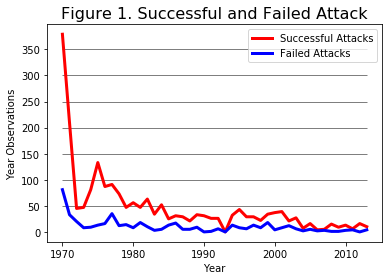

In [5]:
fig_1_fin('Data/globalterrorismdb_0919dist.xlsx')

The condition for subsetting the data for Figure 1 is straightforward. By switching $SUCCESSFUL $ to 1 or 0 we could observe the trend of successful attacks and failed attacks. Overall terrorist activities are downward trending. In 2002 the failed rate show a upward trend while the success is trending downward is due to the amount of observations in the same event. A college student distributed 18 pipe bombs through mail services and half of them did not detonate. Notable events throughout this time period include 19.04.1995 Oklahoma bombing and 911 in 2001, which are also the most devastating attacks. Please note that this figure is slightly different to the one that the author originally presented. I find it more intuitive to just present the figure in year observations, since the general goal is to simply showcase the downward trend.

##### Table 1. Terror Attacks: Descriptive Statistics

In [6]:
pd.options.display.float_format = "{:,.3f}".format
result= table_1_fin('Data/Final-Sample1a.dta')    
result.set_index(['Section', 'Index'])

Observations Percentage  Attack Success  \
Section Index                                                               
Tactics Assassination                       76      0.075           0.763   
        Armed Assualt                      125      0.123           0.968   
        Bombing                            441      0.435           0.816   
        Infrastructure                     474      0.468           0.939   
        Unarmed                             33      0.033           0.545   
        Other and Unknown                   37      0.037           0.946   
Target  Business                           270      0.267           0.907   
        Government                         175      0.173           0.806   
        Abortion related                   179      0.177           0.888   
        Airport                             39      0.038           0.897   
        Educational Institution             99      0.098           0.808   
        Private property                   198      0.195           0.859   
        Religious Institution               63      0.062           0.905   
        Other and Unknown                  279      0.275           0.903   
Weapon  Firearms                           171      0.169           0.918   
        Explosives                         446      0.440           0.814   
        Incendiary                         457      0.451           0.934   
        Melee                               32      0.032           0.969   
        Sabotage                            29      0.029           0.966   
        Other and unknown                  184      0.182           0.777   
Others  Lone wolf                          552      0.545           0.841   
        Multiple Attacks                   301      0.297           0.950   
        Target non-United States            84      0.083           0.881   
        Logistic international              56      0.055           0.804   
        Total Observations                1013                      0.857   

                                  Injured  Killed   Damage(USD)  
Section Index                                                    
Tactics Assassination               0.707   1.190   140,331.737  
        Armed Assualt               3.754  26.000   444,384.787  
        Bombing                     4.372   0.747   630,109.018  
        Infrastructure              0.872   0.136   849,112.208  
        Unarmed                    47.941 153.667   128,727.571  
        Other and Unknown           4.559  86.314   431,684.998  
Target  Business                    4.941  11.719 1,241,421.210  
        Government                 12.157   3.093   564,200.699  
        Abortion related            0.151   0.050   183,748.273  
        Airport                    10.200  86.486   517,239.099  
        Educational Institution     1.775   0.250 1,047,361.648  
        Private property            3.575  17.290 1,180,161.941  
        Religious Institution       0.789   0.614   496,292.141  
        Other and Unknown           5.573  12.329   417,488.442  
Weapon  Firearms                    2.214   1.166   407,839.814  
        Explosives                  4.363   0.780   645,868.165  
        Incendiary                  0.908   7.186   879,277.233  
        Melee                       5.774  97.548   375,226.577  
        Sabotage                    3.889   0.107   337,631.935  
        Other and unknown           8.263  21.957   818,939.777  
Others  Lone wolf                   2.652   0.601   675,954.812  
        Multiple Attacks            5.408  10.140   811,582.424  
        Target non-United States    3.403   0.795   250,276.493  
        Logistic international      3.022   0.578   128,933.135  
        Total Observations          3.244   3.969   757,978.750

This table provided us detailed information on tactics, weapons, targets and additional info. Let's start by explaining some of the labels. 'Unarmed Assault' under the tactic section is described as an attack which the primary object is causing physical harm or death directly. It includes and is not limited to chemical, biological, and radiological weapons. 'Infrastructure' tactic is classified all attacks directed towards nonhuman target (Public transportation, monument....etc). Notice that Hijacking and Arson are categorised under the 'Other and Unknown' in tactics. 'Other and Unknown' label under the target section includes NGO, police, tourists, water/food supply... etc. All 'Lone wolf' attacks are individual attacks that are not linked to terrorist organisation. 'Logistic International' denotes perpetrator that are non-Americans. 

One may immediately notice the average of columns did not equal the last total observations, this is because incident could have multiple labels. For instance, the attack on 11.09 consists two attack types (Armed assault and Hijacking), targeting multiple targets (Government, Business...etc) ,and usage of multiple weapon types. Out of all attack tactics, infrastructural attacks produced the highest property damage, but did not lead to a lot of deaths. We can also observed that assassinations and unarmed assault possessed the lowest success rate throughout the tactics. The majority of targets are Businesses and 'Other and unknown'. Airports on the other hand are rarely considered, but possessed a high successful rate and a high number of mortality. Out of all weapon choices, explosive have a rather low successful rate. There were plenty occasions in our samples that the IED failed to denote due to technical issues or been intercepted. One thing to notice is that the exact number of property damage is unknown for two-third of the terror attacks. Categorical lables are used to remedy this situation: GTD contains estimation for the size of the attack, which is split into 'Catastrophic' (More than \\$1 billion), 'Major' (More than \\$1 million but smaller than \\$1 billion), and 'Minor' (less than \\$1 million). 

From this summary table we are suggested that terror attack tactics and weapon usage are statistically relevant to the rate of success. Certain type of attacks causes more damage and deaths. Also the number of attempts contributed to the heighten success rate. This explains why Brodeur (2018) decided to include number of events, weapon and attack fixed effects in the analysis, in order to recreate similar settings.  

## 4.2 Main Results <a id='chap4.2'></a>

### 4.2.1. Basic Model <a id='chap4.2.1'></a>

The following table 5 will present us with the main result from the basic model specified in Section 3. Figures will be used to support the table. Although Brodeur (2018) had already presented plenty of visual evidence, I added further extension figures to complete the whole analysis. There will also be another subsection of extensions, as the original figures did not include all fixed effects. 


<div class="alert alert-block alert-info">
<b>Note:</b> 
The author achieve his county-level observations via clustering FIPS indicator code on the original observation. The FIPS code contains confidential resident information obtained from <a href="https://data.sca.isr.umich.edu/data-archive/mine.php">UMCS</a>. Table 10 is unable to be reconstructed, as it required matching the FIPS codes onto each observations. More regarding this matter could be found in the Replication documents by the author.
</div>

##### Table 5: Successful Terror Attacks and Employment/Wages

In [7]:
### table 5
pd.options.display.float_format = "{:,.3f}".format
result= table_5_fin('Data/Final-Sample2.dta')
result.set_index(['Section', 'Index'])

100*ln(jobs/population)(1)  \
Section                     Index                                                
Success(Three years before) coefficient                                  0.037   
                            Robust Standard Error                        0.422   
Success(Two years before)   coefficient                                  0.079   
                            Robust Standard Error                        0.311   
Success(One year before)    coefficient                                Omitted   
                            Robust Standard Error                      Omitted   
Success                     coefficient                                  0.038   
                            Robust Standard Error                        0.515   
Success(One year after)     coefficient                                 -1.038   
                            Robust Standard Error                        0.445   
Success(Two years after)    coefficient                                 -1.394   
                            Robust Standard Error                        0.481   
Success(Three years after)  coefficient                                 -1.396   
                            Robust Standard Error                        0.553   
Success(Four years after)   coefficient                                 -1.296   
                            Robust Standard Error                        0.602   
Success(Five years after)   coefficient                                 -1.510   
                            Robust Standard Error                        0.708   
Additional Info             Year, Month & County FE                          ✓   
                            Month*Year                                           
                            Type Attack FE                                       
                            Weapon FE                                            
                            R-squared                                    0.667   
                            Observations                                  4810   

                                                    100*ln(jobs/population)(2)  \
Section                     Index                                                
Success(Three years before) coefficient                                  0.044   
                            Robust Standard Error                        0.420   
Success(Two years before)   coefficient                                  0.068   
                            Robust Standard Error                        0.311   
Success(One year before)    coefficient                                Omitted   
                            Robust Standard Error                      Omitted   
Success                     coefficient                                  0.078   
                            Robust Standard Error                        0.510   
Success(One year after)     coefficient                                 -1.034   
                            Robust Standard Error                        0.442   
Success(Two years after)    coefficient                                 -1.412   
                            Robust Standard Error                        0.479   
Success(Three years after)  coefficient                                 -1.405   
                            Robust Standard Error                        0.556   
Success(Four years after)   coefficient                                 -1.318   
                            Robust Standard Error                        0.602   
Success(Five years after)   coefficient                                 -1.478   
                            Robust Standard Error                        0.714   
Additional Info             Year, Month & County FE                          ✓   
                            Month*Year                                           
                            Type Attack FE                                   ✓   
                            Weapo

Table 5 presented us with the OLS estimates from the basic model. Each column is also marked with the fixed effects included in the regression. Notice that from column 1 to 3, the dependent variable is the county-year ratio of jobs-to-population while in 4 to 6 we switch the dependent variable to county-year ratio of total real earnings-to-population. One of the interesting differences between these two ratios is in the same year as the attack. During the year of attack, employment seems to be totally unaffected by the impact, which is visualised in the below section. The reason however is simply because CBS documented their employment data in March while most successful attacks took place in sometime afterwards. The impact started to show its true colour after post-attack year 1 as the estimates for the following years are all negative. Also note that the estimates in all pre-attack years are all statistically nonsignificant, which translate into no relationship between the attack and the outcomes. After the impact, the results are all statistically significant, even though the estimation are less precise for the fourth and fifth year. The later added fixed effect treatment **did not** interfere with the statistical significance on both post and pre year. Visual summaries will be provided in the next subsection to aid our claims on the statistical significance, as no p-values could be found in table 5. 

Overall, this table allows us to gather the first piece of evidence that a successful attack will result in a negative economic shock in the targeted counties. 

####  i. Visual Evidence

In this subsection, I will provide visual evidence from Brodeur (2018) to show the statistical significance claim in table 5. I deliberately lower the significance level to 5% instead of 10%, as doing so requires stronger evidence to reject the $H_{0}$. All figures (including extension) below will be estimators plotted with a 95% of confidence interval. Notice in this subsection, only time and county fixed effects are active. Please consider the two plots below:

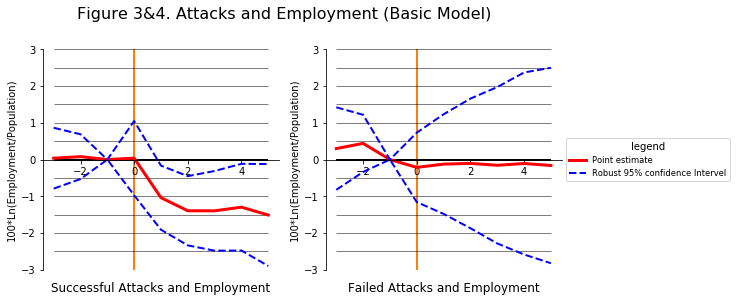

In [8]:
fig_3and4_fin('Data/Final-Sample2.dta')

The orange horizontal line denotes the treatment time period. As the plot suggested, we can see clearly that both estimators are significant in the pre-attack periods. 95% of the samples we collected will be within the downward slopping intervals, and the estimator we generated from our basic model perfectly captured the trend. The other graph is a small experiment done by the author, as he wanted to see if failed attacks will also contributed to negative economics shock in the job market using similar settings. As we can see in this figure, the trend is almost non-existent, even though 95% of the samples could be explained by the estimation. We can conclude that failed attacks would not contribute any negative shocks. Please now consider the following two figures (5 and extension 5):

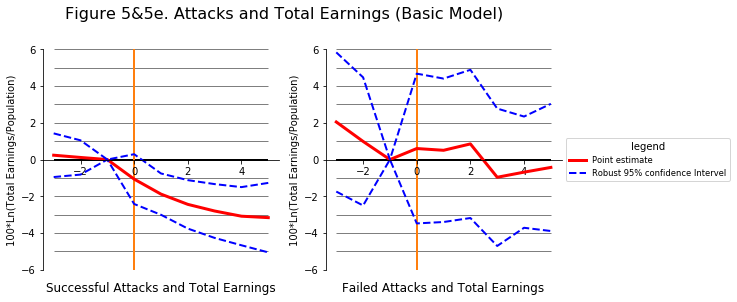

In [9]:
fig_5and5e_fin('Data/Final-Sample2.dta')

The first figure is originally included; as for the second is an extension to complete the visual evidence. Similar to the employment in Figure 3, the Earnings in successful attack also express a downward trend within the 95% interval. The failed attack impact on earning, according to the plot, would actually increase the earning then decrease it at post-attack year 3 while trending upward again. My personal take on this special expression is that the fluctuation is caused by the idiosyncratic risk from the targeted county economy, which again is irrelevant with the attack itself.

#### ii. Figures Extensions

Starting from below will be the extension that I mentioned in the beginning. Notice that I included the appendix Figure 4 from the paper as this figure suits the entire theme of the extension. The extension aims to complement the omitted fixed effects from the original figures, such as month-by-year attack types and weapon types in column 3 and 6. Also non-American and logistical international are both added as dummy variables in the regression.

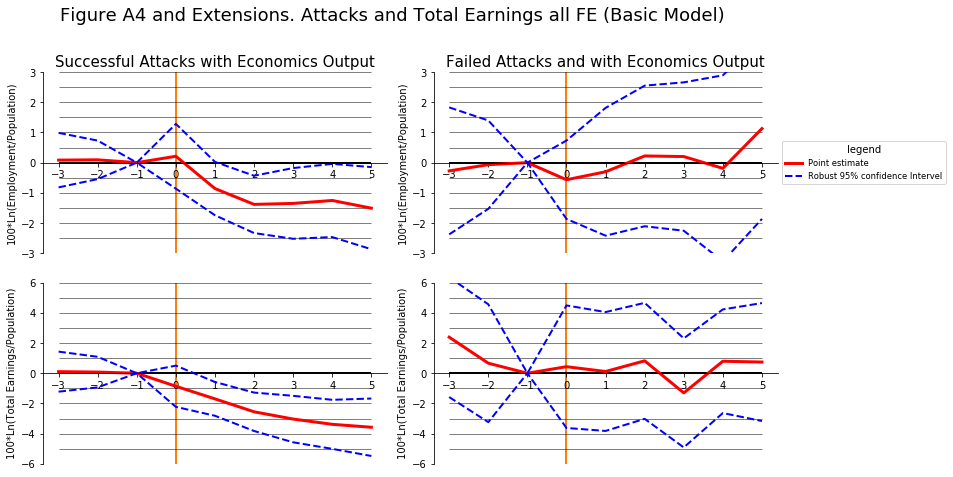

In [10]:
fig_a4andall_fin('Data/Final-Sample2.dta')

The two figures on the left hand side support our claim that the addition fixed effects would not affect the statistical significance from both sides of the time line. Notice that the dependent variable for the figure above is employment while the other is total earnings. I took the liberty to also test the failed attacks shown by the two figures on the right. Both of which also express similar conclusion as their counterparts without the fixed effects.

### 4.2.2 Comparison Model <a id='chap4.2.2'></a>

In this subsection, we will shift our focus to the comparison model. Three dependent variables are individually tested in each panel of Table 6: Jobs-to-Population ratio, Total-Earnings-to-Population ratio, and Average-Earnings per Job. Similarly, visual evidence regarding significant level will be provided afterwards. Additional indirect effects (spillover and number of establishments) are also analysed.

In [11]:
pd.options.display.float_format = "{:,.3f}".format
result= table_6_fin()
result.set_index(['Section', 'Index'])

(1)    (2)  \
Section           Index                                   
                                            ----   ----   
Successful Attack coefficient                    -1.995   
                  Robust Standard Error           0.900   
Post Attack       coefficient             -1.087  0.610   
                  Robust Standard Error    0.364  0.841   
Both Sections     R Squared                0.690  0.691   
                                            ----   ----   
Successful Attack coefficient                    -2.484   
                  Robust Standard Error           1.180   
Post Attack       coefficient             -1.586  0.526   
                  Robust Standard Error    0.494  1.117   
Both Sections     R Squared                0.631  0.632   
                                            ----   ----   
Successful Attack coefficient                    -0.489   
                  Robust Standard Error           0.761   
Post Attack       coefficient             -0.500 -0.084   
                  Robust Standard Error    0.285  0.632   
Both Sections     R Squared                0.411  0.411   
Additional Info   Year, Month & County FE      ✓      ✓   
                  Month*Year                              
                  Division*Year                           
                  Type Attack FE                          
                  Weapon FE                               
                  Observations              4414   4414   

                                                                         (3)  \
Section           Index                                                        
                                                     100*ln(jobs/population)   
Successful Attack coefficient                                         -1.983   
                  Robust Standard Error                                0.899   
Post Attack       coefficient                                          0.590   
                  Robust Standard Error                                0.838   
Both Sections     R Squared                                            0.692   
                                           100*ln(total earnings/population)   
Successful Attack coefficient                                         -2.558   
                  Robust Standard Error                                1.184   
Post Attack       coefficient                                          0.543   
                  Robust Standard Error                                1.126   
Both Sections     R Squared                                            0.634   
                                             100*ln(average earning per job)   
Successful Attack coefficient                                         -0.575   
                  Robust Standard Error                                0.750   
Post Attack       coefficient                                         -0.047   
                  Robust Standard Error                                0.629   
Both Sections     R Squared                                            0.422   
Additional Info   Year, Month & County FE                                  ✓   
                  Month*Year                                                   
                  Division*Year                                                
                  Type Attack FE                                               
                  Weapon FE                                                    
                  Observations                                          4414   

                                             (4)    (5)    (6)  
Section           Index                                         
                                            ----   ----   ----  
Successful Attack coefficient             -2.191 -1.986 -1.818  
                  Robust Standard Error    0.853  0.876  0.852  
Post Attack       coefficient              0.734  0.436  0.573  
                  Robust Standard Error

Only observations that includes three years after the attack and three years prior to the attack are included. The first column of table 6 only included the $POSTATTACK$, notice as we specified earlier, this variable itself is capable of identifying the total effect of both successful and failed attack's impact on dependent variables (please consult the graph in Section 3). The negative nature of the coefficient in column 1 suggested either successful or failed attacks or both produce negative shocks. The addition of $SUCCESSFUL$ variable showed us the comparison effect of successful attack and failed attack given that attack occurs. A clear connection then is established within the table between the difference of treatment and the reduction in the dependent variables. In Column (2) of first panel, the author drawn the conclusion that a successful attack would result in a 2 percent reduction in job-to-population ratio. The same goes to other panels, with each of them showing negative estimation from the treatment effect (slightly higher value for Earnings and lower for average earning per job). The estimations for both employment and earning are again significant; while the average earning per job is not. This suggested even though the successful attack did result in significant reduction in aggregated earnings, average earnings would not show significant decrease. Notice the difference between column 2 and 3: In Column (3), the author included Non-American and Logistic International dummy variables. The author also added more fixed effects gradually until column 6, which all fixed effects are enabled.  

At this point we have successful identify the true treatment effect, and pinpoint the consequences it generated.

#### iii. Visual Evidence (II)

The general set up will be similar to subsection i. All figures within will present both the point estimators and the 95% confidence interval. Please consult the following two figures:

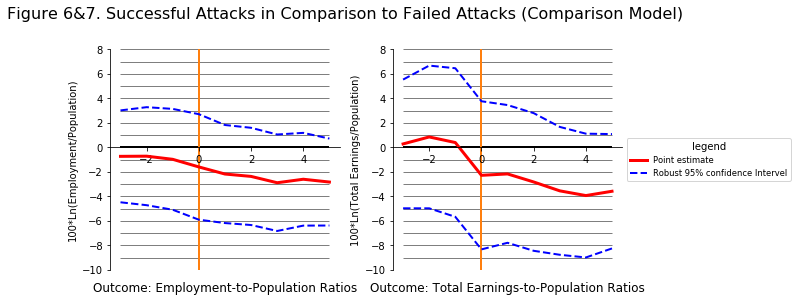

In [12]:
fig_6and7_fin('Data/Final-Sample2.dta')

Once again the estimators show promising result as 95% of the samples lays within the interval. We do need to modify our comparison model by including dummy variables for each year that encapsulate the leads-and-lags, ceteris paribus. The modified version thus became:
\begin{equation}
Y_{c,t} = \alpha + \sum^{5}_{\tau=-3} \eta_{\tau} SUCCESSFUL_{c, t-\tau} + \sum^{5}_{\tau=-3}\zeta_{\tau} POSTATTACK_{c, t-\tau} + \theta_{c} + \delta_{t}+ \epsilon_{c, t}
\end{equation}

The setting of $SUCCESSFUL_{c, t}$ is the exact same as the original comparision model, which denotes 1 when a successful attack occured and 0 for counties that got failed attack in year $t$. Notice that these two figures align with our result from Table 6, which stated the successful attack compared to  failed attack will result in approximately 2% reduction in earnings and employment. Please then consult the following figures:

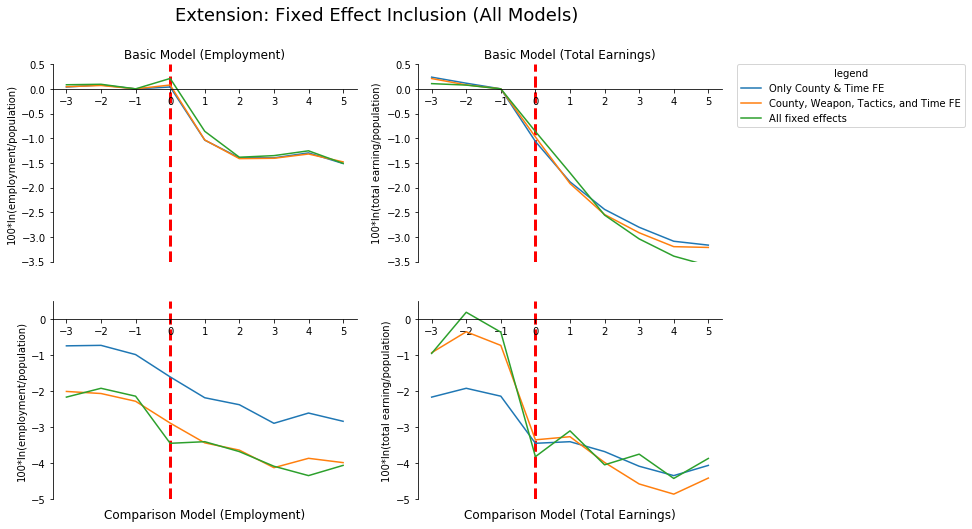

In [13]:
fig_allsum_fin()

This is a visualised extension of the original Appendix Table 3. The original focus of the table is to show the comparison model under different fixed effects. I also include the basic model, as I feel like this is the perfect place to present a summary for all fixed effects with different dependent variables. The overall results with different fixed effects enacted align with the original figures from Brodeur (2018), which only includes county and time FE.

#### iv. Additional Analysis

In this subsection, we will go through additional analysis namely spillover and establishment effects by using the comparison model. The methodology regarding each of them would be explained along with interpretations of the outcome.

##### Table Appendix 4: Comparison of Successful and Failed Terror Attacks (Spillovers)

In [14]:
pd.options.display.float_format = "{:,.3f}".format
result=table_a4_fin('Data/Final-Sample4.dta')
result.set_index(['Panel', 'Section', 'Index'])

100*ln(Jobs/Pop)(1)  \
Panel                                             Section           Index                                         
Neighboring counties instead of targeted counties Successful Attack coefficient                          -1.426   
                                                                    Robust Standard Error                 0.692   
                                                  Post Attack       coefficient                           1.270   
                                                                    Robust Standard Error                 0.626   
                                                  Both Sections     R Squared                             0.455   
                                                                    Observations                                  
Non-targeted counties with an airport             Successful Attack coefficient                          -0.910   
                                                                    Robust Standard Error                 1.380   
                                                  Post Attack       coefficient                           0.267   
                                                                    Robust Standard Error                 1.292   
                                                  Both Sections     R Squared                             0.570   
                                                                    Observations                                  
Both Panels                                       Additional Info   Year, Month & County FE                   ✓   
                                                                    Month*Year                                    
                                                                    Type Attack FE                                
                                                                    Weapon FE                                     

                                                                                            100*ln(Jobs/Pop)(2)  \
Panel                                             Section           Index                                         
Neighboring counties instead of targeted counties Successful Attack coefficient                          -1.317   
                                                                    Robust Standard Error                 0.658   
                                                  Post Attack       coefficient                           1.140   
                                                                    Robust Standard Error                 0.592   
                                                  Both Sections     R Squared                             0.457   
                                                                    Observations                          19306   
Non-targeted counties with an airport             Successful Attack coefficient                          -1.082   
                                                                    Robust Standard Error                 1.234   
                                                  Post Attack       coefficient                           0.445   
                                                                    Robust Standard Error                 1.175   
                                                  Both Sections     R Squared                             0.572   
                                                                    Observations                           1751   
Both Panels                                       Additional Info   Year, Month & County FE                   ✓   
                                                                    Month*Year                                    
                                                                    Type Attack FE                            ✓   
                                                                  

Brodeur (2018) use county adjacency data from the US Census to examine neighboring counties of the targeted counties. He then estimated the impact of successful attack versus a failed one on the neighboring county instead of targeted location. This method allow us to evaluate the spillover effect in surrounding counties. In Panel A, we can see that the point estimators for employment and earnings are smaller than targeted counties compared to Table 6. Please note that most of the estimators are statistically non-significant. In Panel B, we add additional criteria subsetting the data from Panel A by requiring the neighboring counties to have an airport. For all of the columns, similar to Panel A, the results are not statistically significant. The timeline is also from 1970 to 2013.

We concluded from this table that the effects of successful attacks are mostly **local**.

##### Table Appendix 5: Comparison of Successful and Failed Terror Attacks (Establishments)

In [15]:
pd.options.display.float_format = "{:,.3f}".format
result=table_a5_fin('Data/Final-Sample8.dta')
result.set_index(['Panel','Index'])

(1)    (2)  \
Panel           Index                                                          
                100*ln(Establishments/Population)                              
A               Successful                                     -0.814 -0.959   
                Successful Standard Error                       0.690  0.644   
                100*ln(Small Establishments/Population)                        
B               Successful                                     -0.812 -0.960   
                Successful Standard Error                       0.688  0.643   
                100*ln(Medium-Sized Establishments/Population)                 
C               Successful                                     -3.112 -2.983   
                Successful Standard Error                       1.427  1.367   
                100*ln(Large Establishments/Population)                        
D               Successful                                     -1.783 -2.329   
                Successful Standard Error                       2.464  2.432   
                100*ln(Jobs/Establishments)                                    
E               Successful                                     -0.513 -0.690   
                Successful Standard Error                       0.690  0.699   
Additional Info Year, Month & County FE                             ✓      ✓   
                Month*Year                                                     
                Division*Year                                                  
                Tactics FE                                                 ✓   
                Weapon FE                                                  ✓   
                Observations                                     4084   4084   

                                                                  (3)  
Panel           Index                                                  
                100*ln(Establishments/Population)                      
A               Successful                                     -0.179  
                Successful Standard Error                       0.678  
                100*ln(Small Establishments/Population)                
B               Successful                                     -0.161  
                Successful Standard Error                       0.678  
                100*ln(Medium-Sized Establishments/Population)         
C               Successful                                     -3.762  
                Successful Standard Error                       1.356  
                100*ln(Large Establishments/Population)                
D               Successful                                     -1.040  
                Successful Standard Error                       2.375  
                100*ln(Jobs/Establishments)                            
E               Successful                                     -1.243  
                Successful Standard Error                       0.796  
Additional Info Year, Month & County FE                             ✓  
                Month*Year                                          ✓  
                Division*Year                                       ✓  
                Tactics FE                                          ✓  
                Weapon FE                                           ✓  
                Observations                                     4084

In this table we studied the relationship between successful attacks and the number of establishments. The small establishment is defined as establishment with a *employee number* smaller than 100. The medium is defined from 100 to 500, and the large establishment includes any number greater than 500. Most of the estimations are generally very subtle, as for Panel A and B the attack effect only result in small percentages change ranging from -2 percent to -0.16. Medium and large establishments express a higher percentage changes, while jobs-to-establishment show small reduction only. Panel A and B are statistically insignificant while for Panel E, the results express weak statistical significance. For instance, under all fixed effects, the result from for Panel E is significant at $\alpha=0.13$. Only in Panel C and D the results are significant. Overall the results suggested the employment effect may be due to small decrease in establishments and the size of targeted counties. 

<div class="alert alert-block alert-info">
<b>Note:</b> 
Some numbers within this table differs than the Online Appendix. I have cross-validate my result by consulting the original code, and the result support my calculation.
</div>

# 5. Robustness Check <a id='chap5'></a>
---

Brodeur (2018) constructed multiple tables in his appendix to validate the results. We would start by first comparing our result using different databank that contain same info. We will then look at the results to a series of hypothetical questions: 

- What if we define our time periods of terrorist attack, namely $\tau$ differently?
- What if we omitted certain years? 
- What if we omitted certain type of terrorist groups?
- What if we omitted Catastrophic Attacks?
- What if we omitted attacks with ambiguous location?

We would finally end our robustness check by analysing the migration channel (mentioned in Section 2). 

## 5.1 Other Data Usage <a id='chap5.1'></a>
---

##### Table Appendix 6: Robustness Checks for Employment and Wages Using Data from Regional Economic Accounts

In [16]:
pd.options.display.float_format = "{:,.2f}".format
result=table_a6_fin('Data/Final-Sample3.dta')
result.set_index(['Section','Index'])

100*ln(Jobs/Population)(1)  \
Section           Index                                                
Successful Attack coefficient                                  -1.27   
                  Robust Standard Error                         0.84   
Post Attack       coefficient                                   0.70   
                  Robust Standard Error                         0.74   
Additional Info   Year, Month & County FE                          ✓   
                  Region*Year                                          
                  Type Attack FE                                       
                  Weapon FE                                            
                  Observations                                  4336   

                                          100*ln(Jobs/Population)(2)  \
Section           Index                                                
Successful Attack coefficient                                  -1.52   
                  Robust Standard Error                         0.77   
Post Attack       coefficient                                   0.86   
                  Robust Standard Error                         0.68   
Additional Info   Year, Month & County FE                          ✓   
                  Region*Year                                          
                  Type Attack FE                                   ✓   
                  Weapon FE                                        ✓   
                  Observations                                  4336   

                                          100*ln(Jobs/Population)(3)  \
Section           Index                                                
Successful Attack coefficient                                  -1.58   
                  Robust Standard Error                         0.75   
Post Attack       coefficient                                   0.86   
                  Robust Standard Error                         0.68   
Additional Info   Year, Month & County FE                          ✓   
                  Region*Year                                      ✓   
                  Type Attack FE                                   ✓   
                  Weapon FE                                        ✓   
                  Observations                                  4336   

                                          100*ln(Average Earnings per Job)(4)  \
Section           Index                                                         
Successful Attack coefficient                                           -0.49   
                  Robust Standard Error                                  0.59   
Post Attack       coefficient                                           -0.15   
                  Robust Standard Error                                  0.51   
Additional Info   Year, Month & County FE                                   ✓   
                  Region*Year                                                   
                  Type Attack FE                                                
                  Weapon FE                                                     
                  Observations                                           4336   

                                          100*ln(Average Earnings per Job)(5)  \
Section           Index                                                         
Successful Attack coefficient                                           -0.57   
                  Robust Standard Error                                  0.59   
Post Attack       coefficient                                           -0.04   
                  Robust Standard Error                                  0.52   
Additional Info   Year, Month & County FE                                   ✓   
                  Region*Year                                                   
                  Type Attack FE                                            ✓   
                  Weapon FE               

The data for employment we utilized throughout our main result is gather from the CBP. With this table, we aimed to see if the result will differ significantly by using the BEA data instead given identical specifications. We can see clearly that the result is almost identical to Table 6. Even though the point estimates from the BEA in Jobs-to-Population ratio is slightly lower, all the estimators are statistically significant. This table confirms our intuition that **the results holds across different database**. 

<div class="alert alert-block alert-info">
<b>Note:</b> 
The author made a minor mistake in Column (6), where in the origin code he forgot to include the i.year. This result in discrepancy in the last column with the online appendix. 
</div>

## 5.2 Time Period Alternatives <a id='chap5.2'></a>
---

##### Table Appendix 7: Sensitivity Test for Selection of Pre- and Post-Terror Attack Periods 

In [17]:
pd.options.display.float_format = "{:,.3f}".format
result= table_a7_fin()
result.set_index(['Panel','Label'])

Year -5 to Year 3  \
Panel                             Label                                
100*ln(Jobs/Population)           Successful                  -1.778   
                                  Successful                   0.823   
                                  Post-Attack                  0.539   
                                  Post-Attack                  0.759   
                                  R-square                     0.743   
100*ln(Total Earnings/Population) Successful                  -2.752   
                                  Successful SE                1.121   
                                  Post-Attack                  1.123   
                                  Post-Attack SE               1.071   
                                  R-square                     0.710   
100*ln(Average Earnings per Job)  Successful                  -0.974   
                                  Successful                   0.729   
                                  Post-Attack                  0.584   
                                  Post-Attack                  0.659   
                                  R-square                     0.579   
Additional Information            Year & County FE                 ✓   
                                  Month*Year                       ✓   
                                  Division*Year                    ✓   
                                  Type Attack FE                   ✓   
                                  Weapon FE                        ✓   
                                  Observations                  5078   

                                                   Year -4 to Year 3  \
Panel                             Label                                
100*ln(Jobs/Population)           Successful                  -1.645   
                                  Successful                   0.816   
                                  Post-Attack                  0.505   
                                  Post-Attack                  0.766   
                                  R-square                     0.744   
100*ln(Total Earnings/Population) Successful                  -2.635   
                                  Successful SE                1.114   
                                  Post-Attack                  1.076   
                                  Post-Attack SE               1.079   
                                  R-square                     0.706   
100*ln(Average Earnings per Job)  Successful                  -0.990   
                                  Successful                   0.722   
                                  Post-Attack                  0.571   
                                  Post-Attack                  0.651   
                                  R-square                     0.574   
Additional Information            Year & County FE                 ✓   
                                  Month*Year                       ✓   
                                  Division*Year                    ✓   
                                  Type Attack FE                   ✓   
                                  Weapon FE                        ✓   
                                  Observations                  4780   

                                                   Year -3 to Year 4  \
Panel                             Label                                
100*ln(Jobs/Population)           Successful                  -1.872   
                                  Successful                   0.806   
                                  Post-Attack                  0.674   
                                  Post-Attack                  0.708   
                                  R-square                     0.736   
100*ln(Total Earnings/Population) Successful                  -2.857   
                                  Successful SE                1.073   
                                  Post-Attack                  1.101   
                 

This table aims to explore other alternatives for setting the periods between pre and post attacks.
Recall that in our comparison model, the time period for terrorist attacks is defined as 3 years prior and 3 years post. The time period will be from 1970 to 2013.The controls not mentioned in the table include a dummy that is equal to one if the target is non-American, a dummy that is equal to one if the attack is logistically international, and a variable that is equal to the number of terror attacks.

The author started by adding more years to the pre-attack year in Column (1) and adding more years to the post-attack year starting from Column (3). All of the above estimations are statistically significant in conventional levels. The percentage the estimators present show similar to Table 6. We concluded again that the alternative periods setting **would not interfere** with our main results.

## 5.3 Specific Year Omission <a id='chap5.3'></a>
---

##### Table Appendix  8: Robustness Checks for Year Omission (Total Employment)

In [18]:
pd.options.display.float_format = "{:,.2f}".format
result= table_a8_final()
result.set_index('Index')

,0,1,2,3,4
Index,,,,,
Year omitted,1970,1971,1972,1973,1974
Success,-2.07,-1.85,-1.80,-1.78,-1.90
Success SE,0.87,0.84,0.83,0.84,0.86
Year omitted,1975,1976,1977,1978,1979
Success,-2.09,-2.01,-1.99,-2.10,-2.01
Success SE,0.87,0.87,0.88,0.87,0.86
Year omitted,1980,1981,1982,1983,1984
Success,-2.12,-2.00,-2.03,-2.02,-2.09
Success SE,0.87,0.87,0.88,0.88,0.87


##### Table Appendix 9: Robustness Checks for Year Omission (Earnings)

In [19]:
pd.options.display.float_format = "{:,.2f}".format
result= table_a9_fin()
result.set_index('Index')

,0,1,2,3,4
Index,,,,,
Year omitted,1970,1971,1972,1973,1974
Success,-2.87,-2.67,-2.60,-2.63,-2.77
Success SE,1.13,1.12,1.11,1.12,1.14
Year omitted,1975,1976,1977,1978,1979
Success,-2.93,-2.77,-2.77,-2.89,-2.70
Success SE,1.13,1.11,1.13,1.14,1.13
Year omitted,1980,1981,1982,1983,1984
Success,-2.86,-2.70,-2.79,-2.78,-2.83
Success SE,1.14,1.13,1.13,1.14,1.13


We will consider both appendix Table 8 and 9 at once, as they were structed identical with the difference being the dependent variables. The setting for all of our models are within year 1970 to 2013, which is 44 years in total. We deliberately omitted a single year one of a time, to check whether doing so result in huge different outcomes. All of the estimators are significant and range from -1,8 to -2,1. This suggested that our findings **are not affected** by the exclusion of few observations.

## 5.4 Specific Incidents Omission <a id='chap5.4'></a>
---

##### Table Appendix 10: Omission of Attacks with Ambiguous Locations and Catastrophic Attacks

In [20]:
pd.options.display.float_format = "{:,.3f}".format
result= table_10_fin('Data/Final-Sample3.dta')
result.set_index(['Section','Index'])

Omit Ambiguous Locations  \
Section                           Index                                              
100*ln(Jobs/Population)           coefficient                               -2.300   
                                  R-squared                                  0.689   
100*ln(Total Earnings/Population) coefficient                               -3.200   
                                  R-squared                                  0.618   
100*ln(Avg Earnings per Job)      coefficient                               -0.900   
                                  R-squared                                  0.399   
Additional Info                   Year, Month & County FE                        ✓   
                                  Month*Year                                         
                                  Division*Year                                      
                                  Type Attack FE                                     
                                  Weapon FE                                          
                                  Observations                                4030   

                                                          Omit Ambiguous Locations  \
Section                           Index                                              
100*ln(Jobs/Population)           coefficient                               -2.834   
                                  R-squared                                  0.700   
100*ln(Total Earnings/Population) coefficient                               -4.143   
                                  R-squared                                  0.650   
100*ln(Avg Earnings per Job)      coefficient                               -1.309   
                                  R-squared                                  0.480   
Additional Info                   Year, Month & County FE                        ✓   
                                  Month*Year                                     ✓   
                                  Division*Year                                      
                                  Type Attack FE                                 ✓   
                                  Weapon FE                                      ✓   
                                  Observations                                4030   

                                                          Omit Ambiguous Locations  \
Section                           Index                                              
100*ln(Jobs/Population)           coefficient                               -2.486   
                                  R-squared                                  0.735   
100*ln(Total Earnings/Population) coefficient                               -4.024   
                                  R-squared                                  0.697   
100*ln(Avg Earnings per Job)      coefficient                               -1.538   
                                  R-squared                                  0.577   
Additional Info                   Year, Month & County FE                        ✓   
                                  Month*Year                                     ✓   
                                  Division*Year                                  ✓   
                                  Type Attack FE                                 ✓   
                                  Weapon FE                                      ✓   
                                  Observations                                4030   

                                                          Omit Catastrophic Attacks  \
Section                           Index                                               
100*ln(Jobs/Population)           coefficient                                -2.234   
                                  R-squared                                   0.687   
100*ln(Total Earnings/Population) coefficient                                -2.961   
        

Appendix Table 10 we omitted attacks with ambiguous attack location and catastrophic attacks. The definition for 'ambiguous' are decentralized attacks or vague location where the attacks took place, such as hostage/hijacking situation where the attack is committed on the plane or attacks that involve police chases. Catastrophic attacks are defined as attacks that result in more than \$ 1 billion damage or killed more than a 100 people. Three different dependent variables are again tested. The results for the first panel of ambiguous attack location show estimations ranging from -2,3 to -2,8 and are statistically significant. The point estimations are only slightly bigger than compared to Table 6, which is acceptable. Panel B and C also show similar characteristics. For column 4 to 6, the result is exactly the same as Table 6. We have thus confirmed that the outliers **would not** affect our results.

## 5.5 Specific Terrorist Groups Omission <a id='chap5.5'></a>
---

##### Table Appendix 11: Omission of Terrorist Groups

In [21]:
pd.options.display.float_format = "{:,.3f}".format
result= table_a11_fin('Data/Final-Sample3.dta')
result.set_index(['Section','Index'])

Omit Environment& Animal  \
Section                           Index                                              
100*ln(Jobs/Population)           coefficient                               -1.850   
                                  Robust Standard Error                      0.919   
                                  R-squared                                  0.669   
100*ln(Total Earnings/Population) coefficient                               -1.339   
                                  Robust Standard Error                      1.176   
                                  R-squared                                  0.593   
100*ln(Avg Earnings per Job)      coefficient                                0.512   
                                  Robust Standard Error                      0.739   
                                  R-squared                                  0.396   
Additional Info                   Year, Month & County FE                        ✓   
                                  Type Attack FE                                 ✓   
                                  Weapon FE                                      ✓   
                                  Observations                                3646   

                                                          Omit Abortion  \
Section                           Index                                   
100*ln(Jobs/Population)           coefficient                    -2.103   
                                  Robust Standard Error           1.013   
                                  R-squared                       0.673   
100*ln(Total Earnings/Population) coefficient                    -2.766   
                                  Robust Standard Error           1.354   
                                  R-squared                       0.631   
100*ln(Avg Earnings per Job)      coefficient                    -0.663   
                                  Robust Standard Error           0.877   
                                  R-squared                       0.431   
Additional Info                   Year, Month & County FE             ✓   
                                  Type Attack FE                      ✓   
                                  Weapon FE                           ✓   
                                  Observations                     3430   

                                                          Omit Islamic  \
Section                           Index                                  
100*ln(Jobs/Population)           coefficient                   -2.625   
                                  Robust Standard Error          0.854   
                                  R-squared                      0.699   
100*ln(Total Earnings/Population) coefficient                   -3.471   
                                  Robust Standard Error          1.186   
                                  R-squared                      0.636   
100*ln(Avg Earnings per Job)      coefficient                   -0.845   
                                  Robust Standard Error          0.792   
                                  R-squared                      0.394   
Additional Info                   Year, Month & County FE            ✓   
                                  Type Attack FE                     ✓   
                                  Weapon FE                          ✓   
                                  Observations                    4318   

                                                          Omit Political  \
Section                           Index                                    
100*ln(Jobs/Population)           coefficient                     -1.520   
                                  Robust Standard Error            1.254   
                                  R-squared                        0.623   
100*ln(Total Earnings/Population) coefficient                     -0.998   
                                  Robust Standard Error            1.594  

All of our samples have included attacks from different terrorist organizations. We will use appendix Table 11 to see if the results change immensively if we omitted certain groups. We start by eliminating results from radical environment/animal protection groups such as Animal Liberation Front. In Column (2) we omitted attacks from extreme Christian organisations such as Army of God. In Column (3) and (4), Islamic terrorist groups and political attacks are respectively omitted. In the Last column we omitted attacks committed by hate groups. All estimations for three dependent variables exhibit similar properties and are all statistically significant. These finding therefore suggested that the main results **are not driven** by omission of certain organisations.

## 5.6 Immigration <a id='chap5.6'></a>
---

###### Table Appendix 12: Relationship Between Terrorism and Population from 1970-2013

In [22]:
pd.options.display.float_format = "{:,.3f}".format
result=table_a12_fin('Data/Final-Sample3.dta')
result.set_index(['Section', 'Index'])

(1)    (2)    (3)    (4)    (5)  \
Section           Index                                                      
Successful Attack coefficient            0.012  0.013  0.008  0.008  0.006   
                  Robust Standard Error  0.014  0.014  0.013  0.013  0.012   
Post Attack       coefficient           -0.012 -0.013 -0.005 -0.006 -0.004   
                  Robust Standard Error  0.012  0.012  0.011  0.011  0.011   
Additional Info   Year & County FE           ✓      ✓      ✓      ✓      ✓   
                  Month*Year                                             ✓   
                  Division*Year                                              
                  Type Attack FE                                  ✓      ✓   
                  Weapon FE                                ✓      ✓      ✓   
                  Observations            4635   4635   4635   4635   4635   

                                           (6)  
Section           Index                         
Successful Attack coefficient            0.005  
                  Robust Standard Error  0.010  
Post Attack       coefficient           -0.004  
                  Robust Standard Error  0.009  
Additional Info   Year & County FE           ✓  
                  Month*Year                 ✓  
                  Division*Year              ✓  
                  Type Attack FE             ✓  
                  Weapon FE                  ✓  
                  Observations            4635

We will conclude our Robustness check by analysing if terrorist attacks result in emigration. Similar setting is used as Panel A in Table 6, but the dependent variable now is log of population. All estimators are statistically insignificant and show almost no changes throughout different settings. We are therefore convinced that the attack **would not affect** this particular channel, moreover, this finding also shows us that our original results are robust, as populations are used as denominators.

<div class="alert alert-block alert-success">
<b>Chapter Conclusion:</b> As we can see from the sensitivity and robustness checks above, outliners and particular sample omission <b>will not interfere</b> with our original results. The above-mentioned findings confirmed our results are robust in different circumstances.
</div>

# 6. Channels Reexamination <a id='chap6'></a>
---

The estimated effect of 2% from table 6 suggested that a successful attack would reduce 9,000 jobs when compared against failed attacks (as the avg jobs in the county are 460,000 from CBP). It is true that successful attack result in human/physical capital damage; but given the amount by job reduction and earnings estimation, this channel alone is not a satisfactory explanation. Therefore, it *must* be the case that successful attack affected jobs through other channels. We will be testing possibly affected channels in this section. We first start with different industries, then move onto housing index. In the end, Brodeur (2018) will provide evidence that successful attacks are more salient than failed ones, and also negatively impact consumer sentiment.

## 6.1 Employment and Earnings by Industry <a id='chap6.1'></a>
---

We will be analysing the impact of negative economic shocks across specific industries. The author first followed the template of [Standard Industrial Classification](https://siccode.com/) to classify his sample, then utilised the comparison model.

##### Table 7: Employment by Industry from 1970 to 1997

In [23]:
pd.options.display.float_format = "{:,.2f}".format
result=table_7_fin('Data/Final-Sample3.dta')
result.set_index(['Section', 'Index'])

(1)               (2)  \
Section           Index                                                         
                  Industries               Manufacturing(1)  Manufacturing(2)   
Successful Attack coefficient                         -5.06             -5.53   
                  Robust Standard Error                1.72              1.69   
Post Attack       coefficient                          2.51              2.64   
                  Robust Standard Error                1.72              1.67   
Both Sections     R Squared                            0.05              0.07   
                  Observations                         3093              3093   
                  Industries                Retail trade(1)   Retail trade(2)   
Successful Attack coefficient                         -0.90             -1.01   
                  Robust Standard Error                1.11              1.11   
Post Attack       coefficient                          0.56              0.66   
                  Robust Standard Error                1.09              1.08   
Both Sections     R Squared                            0.61              0.62   
                  Observations                         3117              3117   
Additional Info   Year, Month & County FE                 ✓                 ✓   
                  Type Attack FE                                            ✓   
                  Weapon FE                                                 ✓   

                                                                         (3)  \
Section           Index                                                        
                  Industries               Construction and Trasportation(1)   
Successful Attack coefficient                                          -4.30   
                  Robust Standard Error                                 1.73   
Post Attack       coefficient                                           3.28   
                  Robust Standard Error                                 1.69   
Both Sections     R Squared                                             0.12   
                  Observations                                          3107   
                  Industries                                     Services(1)   
Successful Attack coefficient                                          -1.23   
                  Robust Standard Error                                 1.28   
Post Attack       coefficient                                           0.61   
                  Robust Standard Error                                 1.23   
Both Sections     R Squared                                             0.89   
                  Observations                                          3115   
Additional Info   Year, Month & County FE                                  ✓   
                  Type Attack FE                                               
                  Weapon FE                                                    

                                                                         (4)  \
Section           Index                                                        
                  Industries               Construction and Trasportation(2)   
Successful Attack coefficient                                          -4.90   
                  Robust Standard Error                                 1.71   
Post Attack       coefficient                                           3.81   
                  Robust Standard Error                                 1.66   
Both Sections     R Squared                                             0.13   
                  Observations                                          3107   
                  Industries                                     Services(2)   
Successful Attack coefficient                                          -1.34   
                  Robust Standard Error                                 1.22   
Post Attack       coefficient      

Notice the time period for this table is 1970 to 1997. After breaking down our samples into different industries, we can see clearly that specific industries are more heavily impacted. Transportation and construction are one of the most heavily impacted industry, along with manufacturing and wholesale trade. This is not surprising, as people generally become pessimistic in public systems due to the outcome of successful attack. For retail trade and services there are some reduction, but are relatively small. We will be looking at the housing industry next subsection.

## 6.2 House Price Index <a id='chap6.2'></a>
---

A successful attack will create a negative economics shock, and in this subsection we will be looking at the housing index. The idea came from [Besley et al.(2012)](#ref4), that suggested house price has a negative correlation with local murder rate. Brodeur (2018) explore the idea whether a successful attack would impact on housing prices, as it is an indicator that reflect consumers sentiment on the market. 

##### Table 8: Housing price with Comparison Model

In [24]:
result=table_house_fin('Data/Final-Sample3.dta', 'Data/housing_index.dta')
result.set_index(['Section', 'Index'])

(1)   (2)   (3)   (4)   (5)   (6)
Section           Index                                                    
Successful Attack coefficient                 -1.79 -1.69 -1.70 -2.15 -1.31
                  Robust Standard Error        1.04  1.04  0.98  1.02  0.68
Post Attack       coefficient           -2.31 -1.38 -1.39 -1.09 -0.09  0.10
                  Robust Standard Error  0.58  0.72  0.70  0.69  0.76  0.54
Both Sections     R Squared              0.90  0.90  0.90  0.90  0.90  0.96
Additional Info   Year & County FE          ✓     ✓     ✓     ✓     ✓     ✓
                  Month*Year                                        ✓     ✓
                  Division*Year                                           ✓
                  Type Attack FE                              ✓     ✓     ✓
                  Weapon FE                 ✓     ✓     ✓     ✓     ✓     ✓
                  Observations           3465  3465  3465  3465  3465  3465

We can see in Table 8 that the housing price indeed decline after successful attacks compared to failed attacks. The result presented in this table are significant and the estimations are ranging from 1,3 to 2,2. We concluded that the housing industry are also heavily impacted.

<div class="alert alert-block alert-success">
<b>Short Conclusion:</b> From Table 7 and 8, we gain insights on local industries. The results suggested specific industries suffer a greater loss than others. The findings are possibly due to the <b>salient nature</b> of the successful outcome and <b>increased pessimism</b> in consumer sentiment from successful attacks.
</div>

## 6.3 Media and Public Awareness <a id='chap6.3'></a>
---

In this section we would be looking at the pessimism from consumer via analysing the media data. Pessimistic sentiment regarding the economics market could arise via questioning the quality of law enforcement, which result in lower economic activities. The author had throughly documented how he gathered and examined data from VTNA (please consult the paper for more details), most importantly, he constructed four variables by using the VTNA database as a reference:

1. $n$ which is equal to the number of news stories of the targeted 'city' and 'year' *e.g. For the Boston Marathon Bombing, the author documented number of searches for 'Boston' and restricted the search year to 2013*
2. A dummy called 'Any terror story' is set to 1 if there was at least 1 news story about it.
3. Number of terror news stories after the attack are also documented
4. The duration for the news stories of a particular attack is also documented

After the variables, Brodeur (2018) constructed an empirical model to check if the salience of successful attack is at least partially responsible for the decrease in employment. Please now consider the following table:

##### Table 9: Media Coverage under Comparison Model

In [25]:
result=table_9_fin('Data/Final-Sample7.dta')
result.set_index('Index')

,All,All,All,ABC,CBS,NBC
Index,,,,,,
,(1),(2),(3),(4),(5),(6)
,,,Any Terror News Stories?,,,
Successful,0.05,0.05,0.05,0.03,0.05,0.03
Robust Standard Error (Success),0.04,0.04,0.04,0.03,0.04,0.03
"ln(n)""City year""",0.01,0.01,0.02,0.01,0.01,0.01
Robust Standard Error (City Year),0.01,0.01,0.01,0.01,0.01,0.01
R-Squared,0.21,0.22,0.22,0.29,0.24,0.28
,,,ln(number of terror news stories),,,
Successful,0.13,0.12,0.12,0.07,0.09,0.05


The empirical model for this table is the following:

\begin{equation}
Y_{c,t} = \alpha + \eta SUCCESSFUL_{c, t} +  X^{'}_{c, t}\gamma + \upsilon_{s} + \delta_{t}+ \epsilon_{c, t}
\end{equation}


**Explaination:**

- $Y_{c,t}$ denotes the news story variables in county $c$ and year $t$
- $X_{c,t}$ represent a vector of all regressor

The sample used will be restricted to county-year observables with at least one failed terror attack. Brodeur (2018) then directly compared observations contain successful attacks with observations contain failed attacks. For every column, state, time fixed effects are added to control reginal and national shocks. Starting from column 2 a dummy variable $year*region$ is added to absorb census region-by-year shocks, and from column 3 time-invariant controls are added. We start by setting the dependent variable as **Any Terror News stories**, it was later changed into **Number of terror news** and **duration of terror news story** respectively in later sections. Column 1 to 3 consider all news from all of the three networks, while in column 4 to 6 are a specific network. In the first section *Any News stories*, we concluded that the getting a story from the news networks is not relevant with the success of an attack. The estimates are rather small and are nonsignificant. In the next section for the overall news networks, we can see that a successful attack will get approximately 13% more news coverage than failed attacks. This also applies to individual news network. All the findings in section is significant. In the last section, we can observe that the general duration for terror news story is higher than failed attacks. 


From this table, we are presented with findings that link successful attacks to media coverage. The author suspected that the reason is because successful attacks are generally **more salient** than failed attacks, as successful attacks cause more casualties.

## 6.4 Consumer Sentiment <a id='chap6.4'></a>
---

In this last section, we would be directly tackling with consumer sentiment after successful attacks. Brodeur (2018) incoporate survey data from MSC. Within the survey (following a successful attack), four essential questions were asked that correspond to each column:

1. Would you say that you are better off or worse off financially than you are a year ago?
2. Would you say that at the present time business conditions are better or worse than a year ago?
3. Do you think in a year after you would be better off, worse off, or remain the same as now?
4. Do you consider now is a good time to purchase major household items such as a fridge, stove or television?

We would then assign the outcome from each question as a dependable variables then fit it with the following equations. There are no *indifference* options in the outcomes, as all negative answers were assigned a value of 1 while all other answers were 0. Notice the timeframe for the data is from 2000 to 2010.

<div class="alert alert-block alert-info">
<b>Note:</b> 
I am unable to recreate this table, as the database required additional fees to access the data. A screen shot from the original paper will be used here to showcase the result. The results here are essential to our conclusion, therefore it must be included.
</div>

<img src="Pics/Table 10.png">

The following model is used for this table:

\begin{equation}
Y_{i,c,t} = \alpha + \eta SUCCESSFUL_{c, t} +  X^{'}_{c, t}\gamma + Z^{'}_{i, c, t}\theta +\upsilon_{s} + \delta_{t}+ \epsilon_{i, c, t}
\end{equation}

*Explainations:*
- $Y_{i,c,t}$ stands for economics sentiment from the survey with individual represented $i$, country denoted by $c$, and year represented with $t$
- $Z_{i, c, t}$ is a vector that contains individual characteristics, including age, gender, education, marital status
- Other setting are the same as above-models

Let's start by looking at Column (1), after the event of successful attack, people actually have a 27% chance to answer that their personal financial conditions were worsen off compared to failed attacks. Similarly, from Column (2), (3), and (4), the postive positive indicates that people tend to be have a pessimistic behavior in all sectors. All of the results above are statistically significant at significant level of 1 percent; the only exception is column 3, which is not significant at $\alpha$ equals 10%.


In conclusion, this table confirmed that successful attacks **will indeed result in** consumers overall attitude to become more pessimistic. People became unwilling of spending money and the results align with our findings in previous analysis.

# 7. Extension: After the Storm <a id='chap7'></a>

My extension is inspired by [Becker et al.(2001)](#ref11) and [Gries et al.(2011)](#ref10). [Becker et al.(2001)](#ref11) is a finding published in the [Wall Street Journal](https://www.wsj.com/) that points towards the recovery on a nationwide scope. [Gries et al.(2011)](#ref10) on the other hand is one of the few papers that also discussed the *causality* of terrorism. In this section, I will cross validate their conclusions under Brodeur (2018) settings. The main focus is to showcase more potential results from the original conclusions drawn by Brodeur (2018). One may immediately question the capability of changing the original observations from county-level to nationwide. As mentioned before, Brodeur (2018) clustered the observations according with FIPS identifiers. Without clustering the sample, we will be able to obtain the nationalwise observations.

There are however a few crucial differences. While Brodeur (2018) focuses on county-level observations of United States, the main focus of [Gries et al.(2011)](#ref10) is on European countries. Brodeur (2018) chooses to use a *DID* model to determine whether a successful terror attack would *cause* a negative shock in the local economy. In comparison, [Gries et al.(2011)](#ref10) rely solely on time series analysis to establish a Granger-causality between terrorist attacks and the future growth rate. A Granger causality is not the causality that we are used to. If A *Granger cause* B, it translates into A is *likely to predict* B rather than A causes B. [Gries et al.(2011)](#ref10) concluded in their paper two main points:

1. All investigated growth and terror series exhibit structural breaks matching major turning points in the countries economic and political history.

2. Economies under attack are successful in adjusting to the threats of terror, so economic growth is not impaired.

The second point resonated with [Becker et al.(2001)](#ref11) while their study is based on observations in United states. Unlike Brodeur (2018) who focuses mainly on local economies, [Becker et al.(2001)](#ref11) also consider the terrorist attacks in a nationwide focus. They concluded, under the assumption that US would take more effective counter-terrorism actions, the overall US economy should not suffer from terrorist attack.

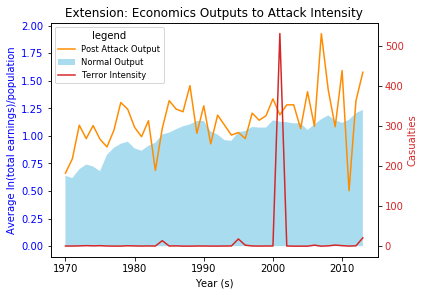

In [29]:
extend_fig1_fin('Data/Final-Sample2.dta')

This graph is a demonstration of the nationwide observations from the GTD database. The attack intensity is followed by the amount of casualties. In 2001 it reached its peek which is the result from 9/11, while smaller peeks in 1984 and 1995 represent Rajneeshee bioterror attack and Oklahoma city bombing. Throughout the time we can see that the normal output does not sway with the terrorist attacks and are stable. Once I have subjected my observations that only include successful attacks, we can see that the economics output result in a more instable manner. I will further test this claim within the observations in the following up section.

In [26]:
extend_za('Data/Final-Sample2.dta')

        Zivot-Andrews Results        
Test Statistic                 -4.001
P-value                         0.351
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.
        Zivot-Andrews Results        
Test Statistic                 -5.720
P-value                         0.002
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.


Zivot-Andrew is a unit-root test that captures the structure break within time series analysis. I follow the suggestion of [Gries et al.(2011)](#ref10) and test the nationalwide observations from Brodeur (2018). The first test is conducted on observations with or without attacks, while the other tested samples only with attacks occurred. We cannot reject the null hypothesis in the first case since the p-value is too large; however, in the second case we reject the hypothesis and show that structure break occurred after attacks. These two results shown above provide evidence to both [Becker et al.(2001)](#ref11) and [Gries et al.(2011)](#ref10). The first result stated that under a nationwide focus, the economics output does not occur a dramatic structure change in general. This is mainly because United States is a big country, an attack at point A may impact the local economy; but the general output will not suffer from dramatic changes. If there exist attack at a nationwide level, the economics output will indeed have a structural change. 

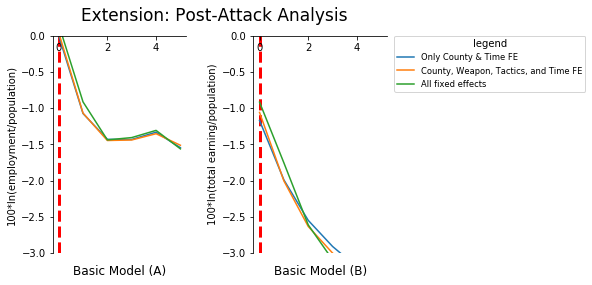

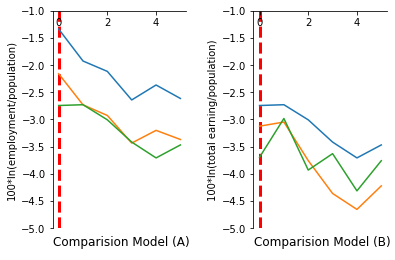

In [2]:
extend_fig2_fin()

This is the results from modified models by Brodeur (2018). Notice that the observations used are again back to county-level. I have restricted the lag in both, the basic model and the comparison model to post-periods, in order to focus on the post-attacks period. Fixed effects are also gradually added as in Brodeur (2018). Unsurprisingly, the basic model also shows us the negative effects after the treatment. The result from the comparison model is however intriguing. On a county level, we can see starting at year 4 that total earnings are showing signs of improvement. Employment is less consistent, but in general also show signs of improvement after year 3. The local economy where the attack happened absorbed most of the impacts, and I have successfully showcased that it will improve after a certain period of time. Also from the previous sections, spillover and immigration does not have a direct relation to the treatment. From the empirical data we can see that most attacks did not occur at multiple locations, meaning other counties are highly possible to be unaffected by the treatment. The aggregated output, which is shown in the first section, does not have a structural break by terrorist attacks. Overall I concluded from this small experiment that the local affected economy **should be able** to recover. On the nationwide stance, it is indeed the case that terrorist treatment is highly ineffective on general output, and even if so, it is likely that the nation could recover. There are potential biases in this hastily drawn conclusion, as I did not account for country size, and other nationwide factors such as the robustness of a country's economy and counter-terrorism expense. However, it does partially prove the conclusions made by [Becker et al.(2001)](#ref11) and [Gries et al.(2011)](#ref10). If the country exhibits good economic performance, the effects on country-level observations are minimal.

# 8. Conclusion <a id='chap8'></a>
---

Brodeur (2018) provided us with a thorough examination of the aftermath of a successful attack. The county-level set up allows the author to bypass backdoor paths and proceed to analyse the effects of successful terrorist attacks with the counterfactual settings. Brodeur (2018) confidently concluded that on a local size base, a successful attack will result in a negative trend on economics output and also successfully established the causality via comparing treatment outcome with counterfactual outcome. 

The Stata code provided from Brodeur (2018) significantly enhanced the transparency of this replication, as I could double check my calculation results with the original output from Stata. I also followed the instruction of [Morgan et al.(2015)](#ref7) to construct a causal graph, which sheds light on the whole identification procedure. The identification assumption is reasonable for both the graph and the verifications. Furthermore, by combining the verification tables with descriptive statistics, the result clears any suspicion for our samples containing unobserved preselection. The results are also robust as they withstand multiple sensitivity and robustness checks. Small discrepancies emerge in some tables afterwards, but are the results of trivial mistakes in the original code. Additionally, I tried to draw a consensus from other papers with Brodeur (2018) models in my extension. The conclusion is not solid, but provides a general support in other nationwide papers.

The major shortcoming of the identification strategy purposed by Brodeur (2018) is however somewhat restrictive. This stategy is useful under micro-level observations such as county or specific region via exploiting the randomness of attack successful rate. However, if a specific region is exposed to continuous attacks for a long period of time, our strategy may result in biases. Moreover, it is not capable of handling nationwide observations, as potential unobservables may bias the results. Below are some other papers that contain possible strategies that address these issues: 

- A 2-step identification strategy is developed by [Abadie et al.(2003)](#ref1), which tackles with the deliberate attacks restriction. [Abadie et al.(2003)](#ref1) based their studies on Basque Country which is targeted by terror attacks repeatedly after 1960 and reached its peak at 1970. The perpetrator is a major separatist group called [Euskadi Ta Askatasuna](https://de.wikipedia.org/wiki/Euskadi_Ta_Askatasuna) (ETA). The identification strategy starts with *synthetically* constructing a counterfactual targeted location by the other unaffected neighbors. Later they utilised the unilateral truce purposed by the ETA in 1998 to benchmark the affected areas with their counterfactual counterparts. 

- Unfortunately, only exiguous papers address the causal effect with the scope of transnational terrorism. [Enders et al.(1991)](#ref9) is a staple paper that lay the groundwork for time-series observations with global terrorist groups in Spain. [Enders et al.(1991)](#ref9) used the Granger-Method with Vector Auto Regression(VAR) to conclude that transnational terror attack will Granger-cause the curtail of foreign tourists. [Mitra et al.(2017)](#ref9) is another paper that explores the consequences of terrorist attacks on multinational level. It also includes the counter-terrorism spending in its model which is lacking in the aforementioned paper.

Brodeur (2018) overall established a rational procedure of analysing the effect of successful terrorist attacks. Even though the scope is limited, it successfully lays a solid foundation in terror attack analysis, as the attack outcomes are intricated by its nature.

# References <a id='ref'></a>
---

*Papers & Journals:*

- Abadie, A., & Gardeazabal, J. (2003). The economic costs of conflict: A case study of the Basque Country. American economic review, 93(1), 113-132. <a id='ref1'></a> 
[Source](https://pubs.aeaweb.org/doi/pdfplus/10.1257/000282803321455188) 

- Becker, G., & Murphy, K. (2001). Prosperity will rise out of the ashes. Wall Street Journal, 29, A22. <a id='ref11'></a> 
[Source](https://www.wsj.com/articles/SB100430580598371160)

- Benmelech, E., Berrebi, C., & Klor, E. F. (2012). Economic conditions and the quality of suicide terrorism. The Journal of Politics, 74(1), 113-128. <a id='ref5'></a> 
[Source](https://www.journals.uchicago.edu/doi/pdfplus/10.1017/S0022381611001101)

- Besley, T., & Mueller, H. (2012). Estimating the Peace Dividend: The impact of violence on house prices in Northern Ireland. American Economic Review, 102(2), 810-33. <a id='ref4'></a>
[Source](https://pubs.aeaweb.org/doi/pdfplus/10.1257/aer.102.2.810) 

- De Mesquita, E. B. (2005). The quality of terror. American journal of political science, 49(3), 515-530. <a id='ref2'></a> 
[Source](https://onlinelibrary.wiley.com/doi/pdf/10.1111/j.1540-5907.2005.00139.x)  

- Enders, W., & Sandler, T. (1991). Causality between transnational terrorism and tourism: The case of Spain. Studies in Conflict & Terrorism, 14(1), 49-58. <a id='ref9'></a> 
[Source](https://www.tandfonline.com/doi/abs/10.1080/10576109108435856)

- Frangakis, C. E., & Rubin, D. B. (2002). Principal stratification in causal inference. Biometrics, 58(1), 21-29. <a id='ref8'></a>
[Source](https://onlinelibrary.wiley.com/doi/pdf/10.1111/j.0006-341X.2002.00021.x)

- Fich, E. M., Nguyen, T., & Petmezas, D. (2019). Uncertainty and Corporate Innovation: Evidence from Terrorist Attacks. Available at SSRN 3394564. <a id='ref3'></a> 
[Source](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3394564)  

- Gries, T., Krieger, T., & Meierrieks, D. (2011). Causal linkages between domestic terrorism and economic growth. Defence and Peace Economics, 22(5), 493-508. <a id='ref10'></a> 
[Source](http://groups.uni-paderborn.de/fiwi/RePEc/Working%20Paper%20neutral/WP20%20-%202009-02.pdf)  

- Mitra, D., Pham, C. S., & Bandyopadhyay, S. (2017). The Effects of Terror on International Air Passenger Transport: An Empirical Investigation. FRB St. Louis Working Paper, (2017-2). <a id='ref9'></a> 
[Source](https://files.stlouisfed.org/files/htdocs/wp/2017/2017-002.pdf)

- Morgan, S. L., & Winship, C. (2015). Counterfactuals and causal inference. Cambridge University Press. <a id='ref7'></a>
[Source](https://books.google.com/books?hl=de&lr=&id=Q6YaBQAAQBAJ&oi=fnd&pg=PR13&dq=counterfactuals+and+causal+inference&ots=nI16O2fXeF&sig=gezBzlSA6ngpjGlg6pTbN5GeqDA)

*Internet Resources:*
- https://diff.healthpolicydatascience.org/
- https://microeconometrics.readthedocs.io/en/latest/#

[Back to Top](#top)